# Nuages de mots

## Imports et stopwords

In [4]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Zack\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem", "tel", "tél", "rue", 
       "bruxelles", "Bruxelles", "Brux", "brux", "maison", "lundi", "mardi", "mercredi", 
       "jeudi", "vendredi", "samedi", "dimanche", "semaine", "ecrire", "bon", "ecr", 
       "fille", "vendre", "louer", "demande", "femme", "place", "prix", "ans", "tres", 
       "très", "heures", "heure", "midi", "grand", "cuit", "cuis", "sach", "des", "dès", 
       "bonne", "peu", "nord", "chez", "mois", "servantes", "poste", "bons", "bon", "quart", 
       "jours", "jour", "etc", "toute", "tout", "tous", "toutes", "vend", "près", "chaussée", 
       "hier", "eau", "soir", "chambre", "belle", "leur", "leurs", "grand", "grande", "francs", 
       "avenue", "suite", "petit", "quelques", "a", "à", "â", "abord", "afin", "ah", "ai", 
       "aie", "ainsi", "allaient", "allo", "allô", "allons", "après", "assez", "attendu", 
       "au", "aucun", "aucune", "aujourd", "aujourd'hui", "auquel", "aura", "auront", "aussi", 
       "autre", "autres", "aux", "auxquelles", "auxquels", "avaient", "avais", "avait", "avant", 
       "avec", "avoir", "ayant", "b", "bah", "beaucoup", "bien", "bigre", "boum", "bravo", "brrr", 
       "c", "ça", "car", "ce", "ceci", "cela", "celle", "celle-ci", "celle-là", "celles", 
       "celles-ci", "celles-là", "celui", "celui-ci", "celui-là", "cent", "cependant", "certain", 
       "certaine", "certaines", "certains", "certes", "ces", "cet", "cette", "ceux", "ceux-ci", 
       "ceux-là", "chacun", "chaque", "cher", "chère", "chères", "chers", "chez", "chiche", "chut", 
       "ci", "cinq", "cinquantaine", "cinquante", "cinquantième", "cinquième", "clac", "clic", 
       "combien", "comme", "comment", "compris", "concernant", "contre", "couic", "crac", "d", "da", 
       "dans", "de", "debout", "dedans", "dehors", "delà", "depuis", "derrière", "des", "dès", "dés", 
       "désormais", "desquelles", "desquels", "dessous", "dessus", "deux", "deuxième", "deuxièmement", 
       "devant", "devers", "devra", "différent", "différente", "différentes", "différents", "dire", 
       "divers", "diverse", "diverses", "dix", "dix-huit", "dixième", "dix-neuf", "dix-sept", "doit", 
       "doivent", "donc", "dont", "douze", "douzième", "dring", "du", "duquel", "durant", "e", "effet", 
       "eh", "elle", "elle-même", "elles", "elles-mêmes", "en", "encore", "entre", "envers", "environ", 
       "es", "ès", "est", "et", "etant", "étaient", "étais", "était", "étant", "etc", "été", "etre", 
       "être", "eu", "euh", "eux", "eux-mêmes", "excepté", "f", "façon", "fais", "faisaient", "faisant", 
       "fait", "feront", "fi", "flac", "floc", "font", "g", "gens", "h", "ha", "hé", "hein", "hélas", 
       "hem", "hep", "hi", "ho", "holà", "hop", "hormis", "hors", "hou", "houp", "hue", "hui", "huit", 
       "huitième", "hum", "hurrah", "i", "il", "ils", "importe", "j", "je", "jusqu", "jusque", "k", "l", 
       "la", "là", "laquelle", "las", "le", "lequel", "les", "lès", "lesquelles", "lesquels", "leur", 
       "leurs", "longtemps", "lorsque", "lui", "lui-même", "m", "ma", "maint", "mais", "malgré", "me", 
       "même", "mêmes", "merci", "mes", "mien", "mienne", "miennes", "miens", "mille", "mince", "moi", 
       "moi-même", "moins", "mon", "moyennant", "n", "na", "ne", "néanmoins", "neuf", "neuvième", "ni", 
       "nombreuses", "nombreux", "non", "nos", "notre", "nôtre", "nôtres", "nous", "nous-mêmes", "nul", 
       "o", "o|", "ô", "oh", "ohé", "olé", "ollé", "on", "ont", "onze", "onzième", "ore", "ou", "où", 
       "ouf", "ouias", "oust", "ouste", "outre", "p", "paf", "pan", "par", "parmi", "partant", 
       "particulier", "particulière", "particulièrement", "pas", "passé", "pendant", "personne", "peu", 
       "peut", "peuvent", "peux", "pff", "pfft", "pfut", "pif", "plein", "plouf", "plus", "plusieurs", 
       "plutôt", "pouah", "pour", "pourquoi", "premier", "première", "premièrement", "près", "proche", 
       "psitt", "puisque", "q", "qu", "quand", "quant", "quanta", "quant-à-soi", "quarante", "quatorze", 
       "quatre", "quatre-vingt", "quatrième", "quatrièmement", "que", "quel", "quelconque", "quelle", 
       "quelles", "quelque", "quelques", "quelqu'un", "quels", "qui", "quiconque", "quinze", "quoi", 
       "quoique", "r", "revoici", "revoilà", "rien", "s", "sa", "sacrebleu", "sans", "sapristi", "sauf", 
       "se", "seize", "selon", "sept", "septième", "sera", "seront", "ses", "si", "sien", "sienne", 
       "siennes", "siens", "sinon", "six", "sixième", "soi", "soi-même", "soit", "soixante", "son", 
       "sont", "sous", "stop", "suis", "suivant", "sur", "surtout", "t", "ta", "tac", "tant", "te", 
       "té", "tel", "telle", "tellement", "telles", "tels", "tenant", "tes", "tic", "tien", "tienne", 
       "tiennes", "tiens", "toc", "toi", "toi-même", "ton", "touchant", "toujours", "tous", "tout", 
       "toute", "toutes", "treize", "trente", "très", "trois", "troisième", "troisièmement", "trop", 
       "tsoin", "tsouin", "tu", "u", "un", "une", "unes", "uns", "v", "va", "vais", "vas", "vé", "vers", 
       "via", "vif", "vifs", "vingt", "vivat", "vive", "vives", "vlan", "voici", "voilà", "vont", "vos", 
       "votre", "vôtre", "vôtres", "vous", "vous-mêmes", "vu", "w", "x", "y", "z", "zut", "alors", 
       "aucuns", "bon", "devrait", "dos", "droite", "début", "essai", "faites", "fois", "force", "haut", 
       "ici", "juste", "maintenant", "mine", "mot", "nommés", "nouveaux", "parce", "parole", "personnes", 
       "pièce", "plupart", "seulement", "soyez", "sujet", "tandis", "valeur", "voie", "voient", "état", 
       "étions", "cour", "anvers", "vente", "serv", "centre", "lieu", "commerce", "salle", "matin", 
       "porte", "mme", "homme", "hommes", "cuisine", "hom", "quartier", "pers", "personnes", "personne",
       "enf", "enfant", "enfants", "point", "jamais", "petite", "vie", "fort", "prés", "janvier", 
       "fevrier", "mars", "avril", "mai", "juin", "juillet", "août", "septembre", "octobre", "novembre", 
       "décembre", "seul", "seule", "voir", "déjà", "vient", "beau", "belle", "beaux", "belles", "fin", 
       "gros", "chamb", "puis", "boulevard", "nouveau", "nouvelle", "nouveaux", "nouvelles", "dame", 
       "dames", "demi", "journ", "fit", "donner", "fils", "garçon", "choix", "louer", "loué", "louée"]
sw = set(sw)


## Créer un fichier contenant le texte de tous les journaux d'une année donnée

In [6]:
# Choisir une année
year = 1900

In [7]:
# Lister les fichiers de cette année
data_path = '../data'
txt_path = '../data/txt'
txts = [f for f in os.listdir(txt_path) if os.path.isfile(os.path.join(txt_path, f)) and str(year) in f]
len(txts)

0

In [9]:
# Stocker le contenu de ces fichiers dans une liste
content_list = []
for txt in txts:
    with open(os.path.join(txt_path, txt), 'r', encoding='utf-8') as f:
        content_list.append(f.read())

In [10]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

0

In [91]:
# Imprimer les 200 premiers caractères du contenu du premier fichier
content_list[0][0:200]

'La bretelle, sur les origines de laquelle le;- •pinions sont contradictoires, n’en remonte pa,> moins à une honorable antiquité. De tous temps, bien que sous des formes diverses, elle a servi à mainte'

In [92]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

In [93]:
# Imprimer le contenu du fichier et constater les "déchets"
with open(os.path.join(temp_path, f'{year}.txt'), 'r', encoding='utf-8') as f:
    before = f.read()

before[:500]

"La bretelle, sur les origines de laquelle le;- •pinions sont contradictoires, n’en remonte pa,> moins à une honorable antiquité. De tous temps, bien que sous des formes diverses, elle a servi à maintenir la culotte et, plus tard, le pantalon. Sous Louis-Philippe, elle eut même son heure de gloire. On la vit aux culottes-à-pont de la garde nationale, et le roi lui-méme, dans telles estampes recherchées par l’amateur, apparait. en négligé, l'êpauie ornée d’une bretelle en tapisserie — offrande con"

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

In [94]:
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

### Appliquer la fonction sur le fichier complet de l'année

In [95]:
clean_text(year, folder=temp_path)

'Output has been written in ../data/tmp/1900_clean.txt!'

In [96]:
# Vérifier le résultat
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

after[:500]

'BRETELLE ORIGINES PINIONS CONTRADICTOIRES REMONTE HONORABLE ANTIQUITÉ TEMPS FORMES SERVI MAINTENIR CULOTTE TARD PANTALON LOUIS PHILIPPE GLOIRE VIT CULOTTES PONT GARDE NATIONALE ROI MÉME ESTAMPES RECHERCHÉES AMATEUR APPARAIT NÉGLIGÉ ÊPAUIE ORNÉE BRETELLE TAPISSERIE OFFRANDE CONJUGALE BOMU VEINE MARIE AMÉLIE BRETELLE ANGLAIS CHOSES SERVENT DAN COURANTE ACCESSOIRE PRATIQUE COMMODE CONSERVE SERVICES RENDUS NOMBRE ENNEMIS IRRÉDUCTIBLES GLISSONS HONORONS BRETELLE TENONS ATILE COMMODE INDISPENSABLE CCE'

## Nuage de mots

### Afficher les termes les plus fréquents


In [97]:
frequencies = Counter(after.split())
print(frequencies.most_common(100))

[('NOTAIRE', 488), ('SERVANTE', 427), ('JEUNE', 383), ('PARIS', 372), ('BNE', 372), ('ADR', 369), ('GÉNÉRAL', 347), ('AGENCE', 313), ('CERT', 304), ('GAZ', 298), ('TEMPS', 295), ('ANGLAIS', 289), ('BOURG', 286), ('JNE', 271), ('FER', 261), ('JARDIN', 260), ('PET', 251), ('PRÉSIDENT', 247), ('MOD', 246), ('ROI', 243), ('GOUVERNEMENT', 236), ('PAYS', 235), ('PART', 235), ('HÔTEL', 234), ('FRANCE', 232), ('CONTENANT', 232), ('PARTIE', 226), ('GUERRE', 225), ('ADRESSER', 225), ('OUVRIERS', 223), ('CAMP', 215), ('ORD', 215), ('COURS', 212), ('CAUSE', 212), ('OUVRIER', 211), ('LOI', 210), ('NOTAIRES', 210), ('PROP', 209), ('TRAVAIL', 208), ('GARE', 205), ('MORT', 203), ('ORDRE', 197), ('OCCASION', 197), ('COURSES', 197), ('MINISTRE', 196), ('MOMENT', 196), ('SERVICE', 195), ('MÉN', 195), ('RÉF', 192), ('CAP', 189), ('BUREAU', 188), ('BELGIQUE', 187), ('ART', 185), ('COM', 185), ('QUESTION', 184), ('RENTIER', 184), ('SOCIÉTÉ', 181), ('GARNI', 181), ('ILLE', 181), ('ROYALE', 180), ('COUP', 179

### Créer, stocker et afficher le nuage de mots

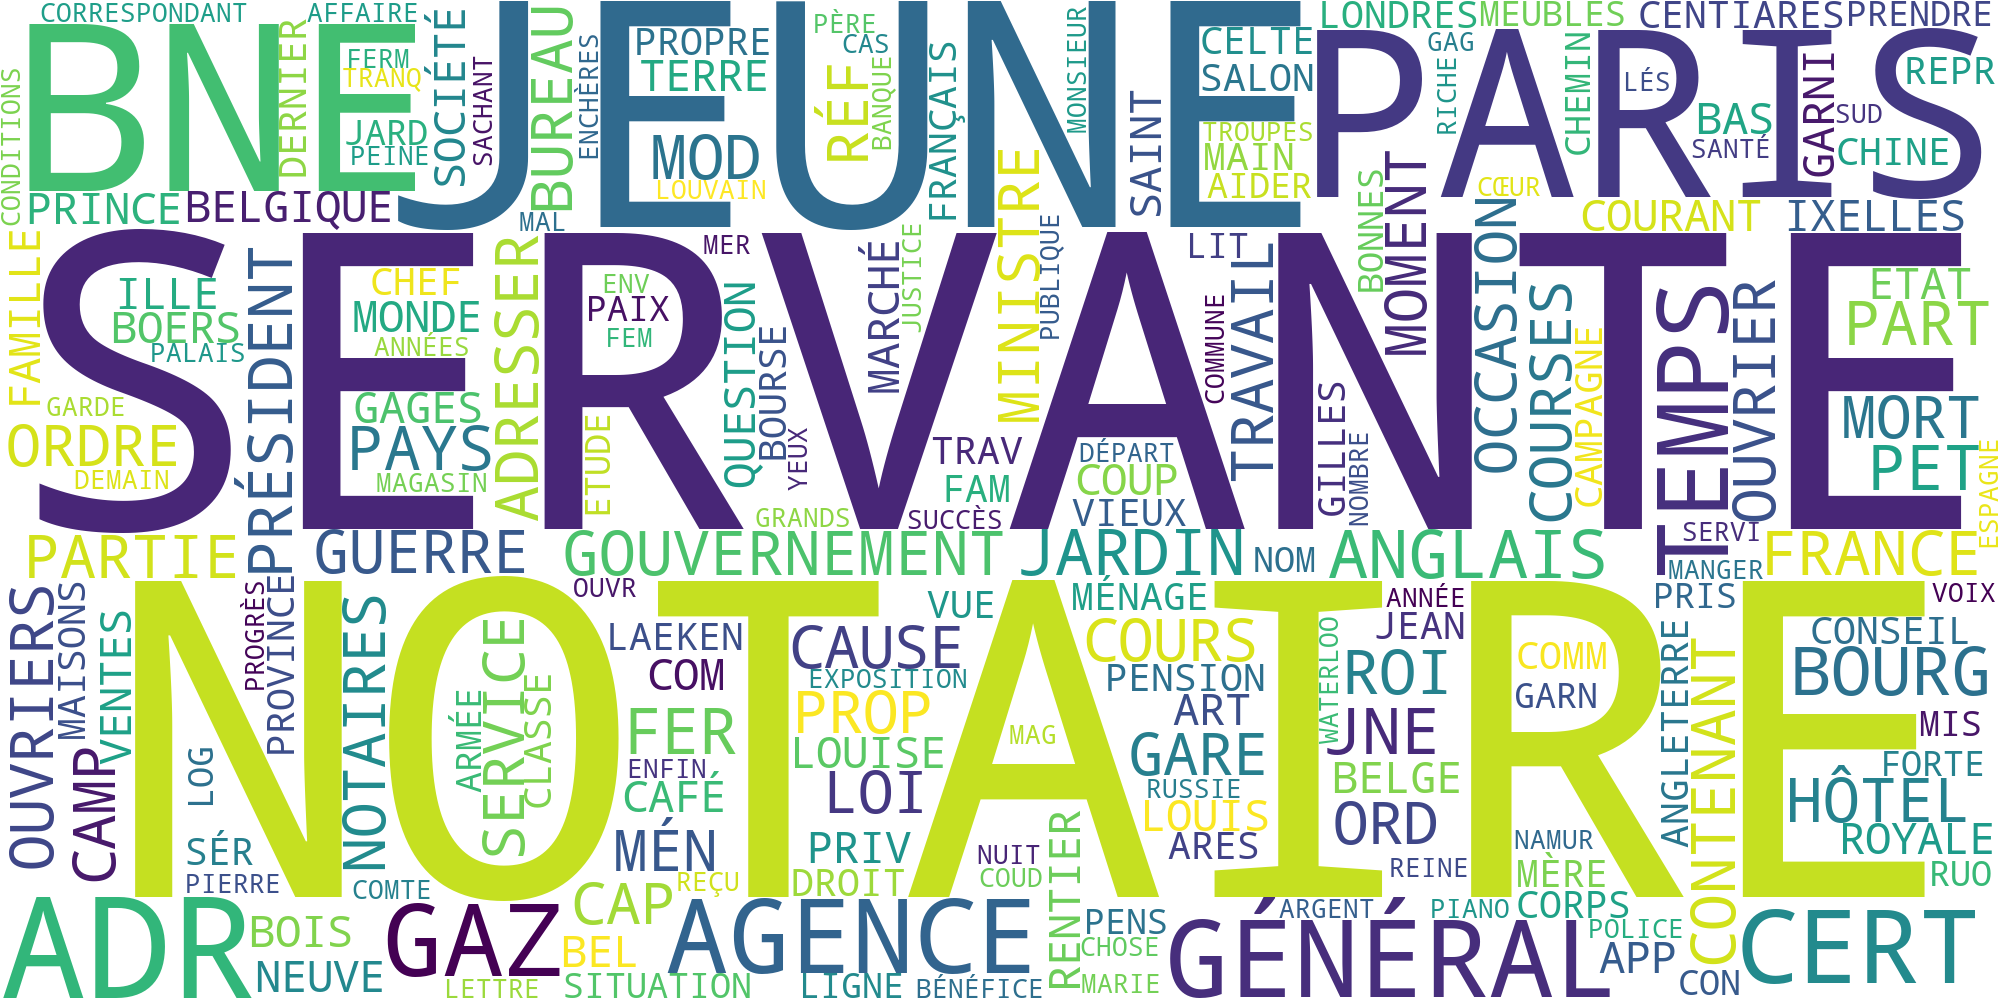

In [98]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))